<a href="https://colab.research.google.com/github/lijunwei19/EC523-homework/blob/main/HW2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2 

<h4>Designed by Xide Xia, with help from Ashok Cutkosky and Brian Kulis. <br> </h4>


---

This assignment will introduce you to:
1. Understanding the power of ReLU activation.
2. Implementing your own autograd.
3. Implementing a simple MLP.
4. Basic functionality in PyTorch

This code has been tested on Colab. 

---

## Preamble

To run and solve this assignment, you need an interface to edit and run ipython notebooks (`.ipynb` files). The easiest way to complete this assignment is to use Google Colab. You can just copy the assignment notebook to your google drive and open it, edit it and run it on Google Colab. All libraries you need are pre-installed on Colab.

---

### Local installation
The alternative is to have a local installation, although we do not recommend it. If you are working on Google Colab, feel free to skip to the next section "More instructions". We recommend using virtual environments for all your installations. Following is one way to set up a working environment on your local machine for this assignment, using [Anaconda](https://www.anaconda.com/distribution/): 

- Download and install Anaconda following the instructions [here](https://docs.anaconda.com/anaconda/install/)
- Create a conda environment using `conda create --name dl_env python=3` (You can change the name of the environment instead of calling it `dl_env`)
- Now activate the environment using : `conda activate dl_env`
- Install jupyter lab, which is the [jupyter project's](https://jupyter.org/index.html) latest notebook interface : `pip install jupyterlab`. You can also use the classic jupyter notebooks and there isn't any difference except the interface.
- Install other necessary libraries. For this assignment you need `numpy`, `scipy` , [`pytorch`](https://pytorch.org/get-started/locally/) and `matplotlib`, all of which can be installed using : `pip install <lib_name>`. Doing this in the environment, would install these libraries for `dl_env`. You can also use `conda install`.
- Now download the assignment notebook in a local directory and launching `jupyter lab` in the same directory should open a jupyter lab session in your default browser, where you can open and edit the ipython notebook.
- For deactivating the environment when you are done with it, use : `conda deactivate`.

For users running a Jupyter server on a remote machine :
- Launch Jupyter lab on the remote server (in the directory with the homework ipynb file) using : `jupyter lab --no-browser --ip=0.0.0.0`
- To access the jupyter lab interface on your local browser, you need to set up ssh port forwarding. This can be done by running : `ssh -N -f -L localhost:8888:localhost:8888 <remoteuser>@<remotehost>`. You can now open `localhost:8888` on your local browser to access jupyter lab. This assumes you are running jupyter lab on its default port 8888 on the server.
- Check "Making life easy" section at the end of [this post](https://ljvmiranda921.github.io/notebook/2018/01/31/running-a-jupyter-notebook/) to find how to add functions to your bash run config to do this more easily each time. The post mentions functions for jupyter notebook, but just replace those with jupyter lab if you are using that interface.

The above instructions specify one way of working on the assignment. You can use other virtual environments/ipython notebook interfaces etc. (**not recommended**).

---

### More instructions

If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

To enter your solutions for the written questions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. We will not accept handwritten solutions.

Put your solutions into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. (Double) click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

**Submission instructions:** please upload your completed solution file (having run all code cells and rendered all markdown/Latex) to the Google Form posted on Piazza by the due date (see Schedule for due dates and late policy).  

Note: `Vector` stands for `column vector` below. 

# Problem 1: Universal approximation power of ReLU networks (20 points)

As we dicussed in class, a two layer NN with sigmoid activation function is a universal approximator, i.e: with sufficient hidden units, it can approximate any real function with desired accuracy. In this problem we want to demonstrate universal approximation power of NNs using ReLU activation units.

## **Q1.1** 
Show that by composing only 2 hidden units in a ReLU network $-\sum_{i=1}^2a_i\ max(0,b_ix+c_i) -$ we can build an approximation to the step function $1[x>0]$


**Solution:**
$$$$
$\ \ \ \ \ \ \ \ \ \ \ \ \ set$ 
$$h(x) = step \ \ function - \sum_{i=1}^{2} a_i max(0, b_ix+c_i)  $$

Prove there exist $a_i, b_i, c_i $that satisfy  $\int_{-\infty}^{+ \infty } |h(x)|  \leq  \epsilon;$ for any $\epsilon > 0  $.
$$$$
Let $c_2 = c_1 -1 =0; a_1 = -a_2 >0$
$$$$
$$ h(x) =
  \begin{cases}
    0       & \quad (-\infty, -\frac{1}{b_1})\\ \\
    b_1x+1  & \quad  [-\frac{1}{b_1}, 0]\\ \\
    1     & \quad (0, +\infty)
  \end{cases}
$$

\\

$$
\int_{-\infty}^{+\infty}|h(x)| \leq \epsilon \\
 \int_{-\infty}^{+\infty}|step \ \ function - \sum_{i=1}^{2} a_i max(0, b_ix+c_i)| \leq \epsilon \\ \int_{-\frac{1}{b_1}}^{0} b_1x+1 \ \ dx \leq \epsilon \\ \frac{1}{2b_1} \leq \epsilon
$$





## **Q1.2** 

Show that by composing 4 hidden units in a ReLU network; we can build an approximation to the unit impulse function of duration $\delta$

\begin{equation}
u_\delta(x) = 1[0\leq x\leq \delta]
\end{equation}

The approximator should have value $1$ between $\frac{\delta}{4}$ and $\frac{3\delta}{4}$ and should be increasing/decreasing on either side of this for a duration of $\frac{\delta}{2}$, i.e., it should be 0 for all values less than $\frac{-\delta}{4}$ and more than $\frac{5\delta}{4}$

**Solution:**

In Q1.1, we have proved 2 hidden units in ReLU network can approximation step function S(x). Theterefore, this question is the same as 2 step function NN can approximation to the unit impluse of duration $\delta$.
$$
S(x+\frac{\delta}{4}) - S(x-\frac{3\delta}{4})\\
\frac{1}{b_1}= \frac{\delta}{2}\\ b_1 = \frac{2}{\delta}
$$

## **Q1.3** 
Using your approximator for the unit impulse function in Q1.2, complete the code given bellow to draw the approximator for different duration values $\delta$.

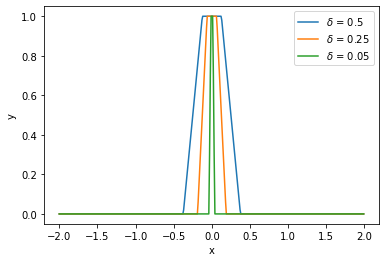

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

def step_fun(x, delta):
    a_1 = 1
    a_2 = -1
    b_1 = 2/delta 
    b_2 = 2/delta
    c_1 = 1
    c_2 = 0
    s = np.subtract(relu(b_1*x+c_1),relu(b_2*x+c_2))
    return s

def hat_u_delta(x,delta):
    y = step_fun(x+delta/4, delta)- step_fun(x-3*delta/4, delta) 

    return y

def draw_impulse(deltas):
    x = np.arange(-2, 2, 0.01).reshape((-1,1))
    for delta in deltas:
        plt.plot(x,hat_u_delta(x,delta))
    plt.legend(['$\delta$ = 0.5', '$\delta$ = 0.25', '$\delta$ = 0.05']);
    plt.xlabel('x')
    plt.ylabel('y');

draw_impulse([0.5, 0.25, 0.05])

## **Q1.4**
Imagine the idea of riemann integral, where we approximate the integrand function with unit impulse functions (fig(1)). 
We will approximate the function $f(x)$ defined over $[a,b]$, using N impulse functions as follows:

$$\hat{f(x)} = \sum_{i=0}^{N-1} f(a + i \delta)\, u_\delta(x-i\delta), $$
where: $$\delta = \lfloor \frac{b-a}{N} \rfloor$$

![riemann-gif](https://drive.google.com/uc?id=1nY1BHbbEpdm7OE3USfc0BhbbEWlTmsvv)

Using your implemented approximator for unit impulse function in Q3.2; complete the code given bellow to approximate the $sin(x)$ function over $[0, 2\pi]$. The code will plot the approximation for different number of impule functions $N$.

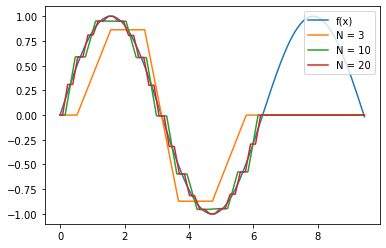

In [ ]:
def f(x):
    return np.sin(x)

def hat_f(x,N,a,b):
    y = np.zeros(x.shape)
    delta = (b-a)/N
    for i in range(N):
        y += f(a+i*delta)*hat_u_delta(x-i*delta,delta)  ## -- ! code required   
    return y

def draw_hat_f(N,a,b):
    x = np.arange(a, 1.5*b, 0.01).reshape((-1,1))
    plt.plot(x,f(x))
    for n in N:
        y = hat_f(x,n,a,b)
        plt.plot(x,y);
    plt.legend(["f(x)"]+["N = " + str(n) for n in N],loc = 'upper right')

draw_hat_f([3,10,20],0,2*3.15)

# Problem 2: Autograd implementation. (30 points)

In class, we discussed the forward and back-propagation in network layers. We pass the input through a network layer and calculate the output of the layer straightforwardly. This step is called forward-propagation. Each layer also implements a function called 'backward'. Backward is responsible for the backward pass of back-propagation. The process of back-propagation follows the schemas: Input -> Forward calls -> Loss function -> derivative -> back-propagation of errors. In neural network, any layer can forward its results to many other layers, in this case, in order to do back-propagation, we sum the deltas coming from all the target layers. 

In this problem, we first show the example of bias layer. And you will implement both forward and backward for the most commonly used layers including: linear, ReLU, sigmoid, softmax, and cross-entropy.

In [ ]:
'''backprop implementation with layer abstraction.
This could be made more complicated by keeping track of an actual DAG of
operations, but this way is not too hard to implement.
'''
import numpy as np


class Layer:
    '''A layer in a network.

    A layer is simply a function from R^n to R^d for some specified n and d.
    A neural network can usually be written as a sequence of layers:
    if the original input x is in R^d, a 3 layer neural network might be:

    L3(L2(L1(x)))

    We can also view the loss function as itself a layer, so that the loss
    of the network is:

    Loss(L3(L2(L1(x))))

    This class is a base class used to represent different kinds of layer
    functions. We will eventually specify a neural network and its loss function
    with a list:

    [L1, L2, L3, Loss]

    where L1, L2, L3, Loss are all Layer objects.

    Each Layer object implements a function called 'forward'. forward simply
    computes the output of a layer given its input. So instead of
    Loss(L3(L2(L1(x))), we write
    Loss.forward(L3.forward(L2.forward(L1.forward(x)))).
    Doing this computation finishes the forward pass of backprop.

    Each layer also implements a function called 'backward'. Backward is
    responsible for the backward pass of backprop. After we have computed the
    forward pass, we compute
    L1.backward(L2.backward(L3.backward(Loss.backward(1))))
    We give 1 as the input to Loss.backward because backward is implementing
    the chain rule - it multiplies gradients together and so giving 1 as an
    input makes the multiplication an identity operation.

    The outputs of backward are a little subtle. Some layers may have a
    parameter that specifies the function being computed by the layer. For
    example, a Linear layer maintains a weight matrix, so that
    Linear(x) = xW
    for some matrix W.
    The input to backward should be the gradient of the final loss with respect
    to the output of the current layer. The output of backprop should be the
    gradient of the final loss with respect to the input of the current layer,
    which is just the output of the previous layer. This is why it is correct
    to chain the outputs of backprop together. However, backward should ALSO
    compute the gradient of the loss with respect to the current layer's
    parameter and store this internally to be used in training.
    '''
    def __init__(self, parameter=None, name=None):
        self.name = name
        self.forward_called = False
        self.parameter = parameter
        self.grad = None

    def zero_grad(self):
        self.grad = None

    def forward(self, input):
        '''forward pass. Should compute layer and save relevant state
        needed for backward pass.
        Args:
            input: input to this layer.
        returns output of operation.
        '''
        raise NotImplementedError

    def backward(self, downstream_grad):
        '''Performs backward pass.

        This function should also set self.grad to be the gradient of the final
        output of the computation with respect to the parameter.

        Args:
            downstream_grad: gradient from downstream operation in the
                computation graph. This package will only consider
                computation graphs that result in scalar outputs at the final
                node (e.g. loss function computations). As a result,
                the dimension of downstream_grad should match the dimension of
                the output of this layer.

                Formally, if this operation computes F(x), and the final
                computation computes a scalar, G(F(x)), then input_grad is
                dG/dF.
        returns:
            gradient to pass to upstream layers. If the layer computes F(x, w),
            where x is the input and w is the parameter of the layer, then
            the return value should be dF(x,w)/dx * downstream_grad. Here,
            x is in R^n, F(x, w) is in R^m, dF(x, w)/dx is a matrix in R^(n x m)
            downstream_grad is in R^m and * indicates matrix multiplication.

        We should also compute the gradient with respect to the parameter w.
        Again by chain rule, this is dF(x, w)/dw * downstream_grad
        '''
        raise NotImplementedError



Below shows an example of the full implementation of the Bias layer, including the forward and backward function. Notice self.grad stores the gradient of the loss with respect to the current layer's parameter.

In [ ]:
class Bias(Layer):
    '''adds a constant bias.
    The bias is assumed to be a K-dimensional ndarray for arbitary K that is
    added to the last K dimensions of a D dimensional input and broadcast
    over the first D-K dimensions.'''

    def __init__(self, bias, name="bias"):
        super(Bias, self).__init__(np.squeeze(bias), name)
        self.weights = np.squeeze(bias)

    def forward(self, input):
        self.input = input
        return self.parameter + self.input

    def backward(self, downstream_grad):
        self.grad = np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.parameter.ndim)))
        return downstream_grad

## **Q2.1** Multiplication layer.

Let's start with the basic linear and bias layer. Show the derivatives of linear layer with respect to $X$.

$Z_{linear} = XW$



**Solution:**

$$\frac{\partial(XW)}{\partial X} = W^T$$


Complete the forward and backward function of the linear layer. In backward, you should ALSO set the self.grad to be the gradient of the loss with respect to the current layer's parameter.

In [ ]:
class Linear(Layer):
    '''Linear layer. Parameter is NxM matrix L, input is matrix v of size B x N
    where B is batch size, output is vL.'''

    def __init__(self, weights, name="Linear"):
        super(Linear, self).__init__(weights, name)
        self.weights = weights

    def forward(self, input): 
        self.input = input
        output = np.dot(input, self.parameter)
        return output
    def backward(self, downstream_grad):
        '''downstream_grad should be BxM.'''
        ## -- ! code required 
        
        self.grad = np.dot(self.input.T,downstream_grad )
      
        upstream_grad = downstream_grad@self.parameter.T
        return upstream_grad

## **Q2.2** Activation layers.

Now let's look at the activation layers. Show the derivatives of ReLU and sigmoid. 
<p>
$ReLU(x) = max(0,x)$
</p> 
<p>
$\sigma(x)=\frac{1}{1+e^{-x}}$
</p> 

Hint: Let's assume the gradient of ReLU is 0 when x is 0.


**Solution:**

$$\frac{\partial ReLU(x)}{\partial x} = 0 \quad \text{when x}\leq 0; \quad =1 \text{when x} \geq 0. $$

$$ \\ \\ $$
$$\frac{\partial \sigma(x)}{\partial x} = \frac{0-(-e^{-x})}{(1+e^{-x})^2} = \sigma (x)*(1-\sigma(x))$$

Complete the forward and backward functions. There is no need to update self.grad since there is no parameter in activation layers. 

In [ ]:
class ReLU(Layer):
    '''ReLU layer. No parameters.'''

    def __init__(self, name="ReLU"):
        super(ReLU, self).__init__(name=name)

    def forward(self, input):
        ## -- ! code required  
        self.output = np.maximum(0,input)
        return self.output

    def backward(self, downstream_grad):
        ## -- ! code required  
        R = np.copy(self.output)
        R[R<=0] =0
        R[R>0] =1
        return np.multiply(R, downstream_grad)


class Sigmoid(Layer):
    '''Sigmoid layer. No parameters.'''

    def __init__(self, name="Sigmoid"):
        super(Sigmoid, self).__init__(name=name)

    def forward(self, input):
        ## -- ! code required  
        # raise NotImplementedError
        self.input = input
        self.output = 1/(1+np.exp(-input))
        return self.output

    def backward(self, downstream_grad):
        ## -- ! code required  
        # raise NotImplementedError
        upstream_grad = np.multiply(self.output,(1-self.output))
        upstream_grad = np.multiply(upstream_grad,downstream_grad)
        return upstream_grad


## **Q2.3**  Loss *layers*.

Show the derivatives of softMax and Cross-entropy. 

<p>
$\sigma(j)=\frac{\exp(w_j^Tx)}{\sum_{k}\exp(w_k^Tx)}$. 
</p> 

<p>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p> 


**Solution:** 
- **2.3.1**

<p>Set $\ \ \ Z_j = w_j^Tx$ </p>
<p>$$\sigma(j)=\frac{\exp(Z_j)}{\sum_{k=1}^N\exp(Z_k)}$$.</p>
$\ \ \ \ \ \ $ when $i = j $:
$$\\ \\ $$
$$\frac{\partial\sigma(j)}{\partial Z_i} = \frac{exp(Z_j)*\sum -exp(Z_j)*exp(Z_i) }{\sum^2} = \sigma(j)*(1-\sigma(i))= \sigma(j)-\sigma(j)*\sigma(i)$$

$\ \ \ \ \ \ $when $i \neq j $:
$$\\ \\ $$
$$\frac{\partial\sigma(j)}{\partial Z_i} = \frac{0 -exp(Z_j)*exp(Z_i) }{\sum^2} = -\sigma(j)*\sigma(i) \\ $$
$$ \\ $$
$$  \frac{\partial\sigma(j)}{\partial Z_i} = 
  \begin{cases} \sigma(j)-\sigma(j)*\sigma(i) & \quad i=j \\ \\ -\sigma(j)*\sigma(i) & \quad i\neq j 
  \end{cases}
$$
$$ \\ \\ $$
- **2.3.2**

$$\quad \frac{\partial L(\hat y, y)}{\partial \hat y} = -\frac{y}{\hat y} + \frac{1-y}{1- \hat y}$$


Complete the forward and backward functions. There is no need to update self.grad since there is no parameter in the layers. 

Hint: You may find [np.einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) helpful when computing the gradient of SoftMax.

In [ ]:
class SoftMax(Layer):
    '''SoftMax Layer, no parameters.'''

    def __init__(self, name="SoftMax"):
        super(SoftMax, self).__init__(name="softmax")

    def forward(self, input):
        '''input is BxN array, B is batch dimension.'''
        ## -- ! code required  
        # raise NotImplementedError  
        output = np.exp(input) / np.sum(np.exp(input),axis=1).reshape(-1,1)
        self.output = output   
        return output

    def backward(self, downstream_grad):
        '''downstream grad should be BxN array.'''
        ## -- ! code required  
        # raise NotImplementedError
        
        return (self.output - downstream_grad)/downstream_grad.shape[0]

class CrossEntropy(Layer):
    '''cross entropy loss.'''

    def __init__(self, labels, name="Cross Entropy"):
        '''labels is BxC 1-hot vector for correct label.'''
        super(CrossEntropy, self).__init__(name="Cross Entropy")
        self.labels = labels

    def forward(self, input):
        '''input is BxN, output is a scalar'''
        ## -- ! code required  
        self.input = input
        output = -np.sum(np.multiply(np.log(input),self.labels))
        return output/self.labels.shape[0]
    def backward(self, downstream_grad):
        ## -- ! code required 
        
        return self.labels



## **Q2.4** Test your implementations.

Now let's build a simple model using your layers, and compare the autograd results with the numeric derivatives. If everything is implemented in the correct way, the autograd results should be very closed to numeric grad.

In [ ]:
def numerical_derivative(layers, input):
    base_output = forward_layers(layers, input)
    delta = 1e-7
    
    for layer in layers:
        if layer.parameter is None:
            continue
        size = layer.parameter.size # total number of params
        shape = layer.parameter.shape # shape of params
        base_param = np.copy(layer.parameter)
        perturb = np.zeros(size)
        grad = np.zeros(size)
         
        for i in range(size):
            perturb[i] = delta # only current i-th perturb is non-zero
            layer.parameter = base_param + np.reshape(perturb, shape) # make a small change (delta) on the i-th parameter
            perturb_output = forward_layers(layers, input) # new output after adding a small change (delta) on the i-th parameter
            grad[i] = (perturb_output - base_output) / delta # update the grad of i-th parameter
            perturb[i] = 0.0 # set it back to zero
            
        layer.parameter = base_param
        layer.grad = np.reshape(np.copy(grad), shape)

def forward_layers(layers, input):
    '''Forward pass on all the layers. Must be called before backwards pass.'''
    output = input
    for layer in layers:
        output = layer.forward(output)
    #assert output.size == 1, "only supports computations that output a scalar!"
    return output


def backward_layers(layers):
    '''runs a backward pass on all the layers.
    after this function is finished, look at layer.grad to find the
    gradient with respect to that layer's parameter.'''
    downstream_grad = np.matrix([[1],])
    for layer in reversed(layers):
        downstream_grad = layer.backward(downstream_grad)


def zero_grad(layers):
    for layer in layers:
        layer.zero_grad()

        
def test_autograd():
    h = 2
    b = 3 
    input = np.random.normal(np.zeros((b, h)))
    labels = np.zeros((b, h))
    for i in range(b):
        labels[i, np.random.choice(range(h))] = 1.0

    layers = [
        Linear(np.random.normal(size=(h, 2 * h))),
        Sigmoid(),
        Bias(np.array([np.random.normal()])),
        Linear(np.random.normal(size=(2 * h, 3 * h))),
        ReLU(),
        Linear(np.random.normal(size=(3 * h, h))),
        SoftMax(),
        CrossEntropy(labels)
    ]
    output = forward_layers(layers, input)
    backward_layers(layers)
    analytics = [np.copy(layer.grad)
                 for layer in layers if layer.grad is not None]
    zero_grad(layers)

    numerical_derivative(layers, input)
    numerics = [np.copy(layer.grad)
                for layer in layers if layer.grad is not None]   
    diff = np.sum([np.linalg.norm(analytic - numeric)/np.linalg.norm(numeric)
                   for analytic, numeric in zip(analytics, numerics)])
    
    assert diff < 1e-5, "autograd differs by {} from numeric grad!".format(diff)


if __name__ == "__main__":
    test_autograd()
    print("looking good!")


looking good!


## Problem 3: Implementing a simple MLP. (25 points)

In this problem we will develop a neural network with fully-connected layers, aka Multi-Layer Perceptron (MLP) using the layers from Problem 2. Below, we initialize toy data  that we will use to develop your implementation.

In [ ]:
# setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print ('X = ', X)
print('\n')
print('y = ', y)


X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


y =  [0 1 2 2 1]


We will use the following class `TwoLayerMLP` to implement our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. 

In [ ]:
class TwoLayerMLP(object):
    def __init__(self, input_size, hidden_size, num_classes, std=1e-1, activation='sigmoid'):
        np.random.seed(0)
        self.input_size = input_size
        self.num_classes = num_classes
        
        self.params = {}
        self.params['W1'] = std * np.random.normal(size=(input_size, hidden_size))
        self.params['W2'] = std * np.random.normal(size=(hidden_size, num_classes))
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2']  = np.zeros(num_classes)

        self.activation = 'sigmoid' 

        self.models = [
                  Linear(self.params['W1']),
                  Bias(self.params['b1']),
                  Sigmoid(),
                  Linear(self.params['W2']),
                  Bias(self.params['b2']),
                  SoftMax()
                  
                ]    
           
    def loss(self, X, y=None, reg=0.0):
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        _, C = W2.shape
        N, D = X.shape

        ###########################################################################
        # TODO: Finish the forward pass, and compute the loss. This should be the 
        # data loss. Store the result in the variable loss, which should be a scalar. 
        # Use the CrossEntropy loss. So that your results match ours.
        ###########################################################################  
        ## -- ! code required  
        score = X
        for layer in self.models:
            score = layer.forward(score)
        if y is None:
            return score
        y_hat = np.zeros((len(y), np.max(y)+1))
        for row, j in zip(y_hat, y):
          row[j] = 1 
        loss = CrossEntropy(y_hat).forward(score)
              
        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################


        grads = {}
        ###########################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights
        # and biases. Store the results in the grads dictionary. For example,
        # grads['W1'] should store the gradient on W1, and be a matrix of same size
        ###########################################################################
        ## -- ! code required  
        
        self.backward_layers(y_hat)

        grads['W1'] = self.models[0].grad
        grads['W2'] = self.models[3].grad
        grads['b1'] = self.models[1].grad
        grads['b2'] = self.models[4].grad
        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################
        return loss, grads


    def backward_layers(self, downstream_grad):
        '''runs a backward pass on all the layers.
        after this function is finished, look at layer.grad to find the
        gradient with respect to that layer's parameter.'''
        for layer in reversed(self.models):
            downstream_grad = layer.backward(downstream_grad)

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_epochs=10,
            batch_size=200, verbose=False):

        num_train = X.shape[0]
        iterations_per_epoch = 1 #int(max(num_train / batch_size, 1))
        epoch_num = 0

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        grad_magnitude_history = []
        train_acc_history = []
        val_acc_history = []

        np.random.seed(1)
        for epoch in range(num_epochs):
            # fixed permutation (within this epoch) of training data
            perm = np.random.permutation(num_train)

            # go through minibatches
            for it in range(iterations_per_epoch):
                X_batch = None
                y_batch = None

                # Create a random minibatch
                idx = perm[it*batch_size:(it+1)*batch_size]
                X_batch = X[idx, :]
                y_batch = y[idx]

                # Compute loss and gradients using the current minibatch
                loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
                loss_history.append(loss)

                # do gradient descent
                for param in self.params:
                    self.params[param] -= grads[param] * learning_rate

                # record gradient magnitude (Frobenius) for W1
                grad_magnitude_history.append(np.linalg.norm(grads['W1']))

            # Every epoch, check train and val accuracy and decay learning rate.
            # Check accuracy
            train_acc = (self.predict(X_batch) == y_batch).mean()
            val_acc = (self.predict(X_val) == y_val).mean()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            if verbose:
                print ('Epoch %d: loss %f, train_acc %f, val_acc %f'%(
                    epoch+1, loss, train_acc, val_acc))

            # Decay learning rate
            learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'grad_magnitude_history': grad_magnitude_history, 
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):        
        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!
        ###########################################################################
        ## -- ! code required  
        y_pred = np.argmax(np.exp(self.loss(X))/np.exp(np.sum(self.loss(X),axis=1)).reshape(-1,1),axis=1)
        ###########################################################################
        #                              END OF YOUR CODE
        ###########################################################################
        return y_pred

### Q3.1 Forward pass

Our 2-layer MLP uses a softmax output layer and the multiclass cross-entropy loss to perform classification. Both are defined in Problem 2.

Please take a look at method `TwoLayerMLP.loss`. This function takes in the data and weight parameters, and computes the class scores (or the logits $z_k(x,\theta)$), the loss ($L$), and the gradients on the parameters. 

- Use the layers designed in **Problem 2** and implement the first part of the function to compute `scores` and `loss`. Afterwards, run the following two test cases.

Note 1: It should be VERY simple to compute the forward propagation by calling the **forward_layers**().

Note 2: **If you're not careful, you could run into numerical underflow/overflow problems with softmax and cross-entropy.** In particular, it involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp) where exponentiated numbers are summed. This can result in underflow/overflow, e.g. getting "nan" (stands for Not A Number) for seemingly ordinary numerical operations. Read about the solution in the link.


In [ ]:
input_size = 4
hidden_size = 10
num_classes = 3

net = TwoLayerMLP(input_size, hidden_size, num_classes)
scores = forward_layers(net.models, X)
print ('(1) Your scores:\n')
print (scores)
print ('\n')
correct_scores = np.asarray([[0.374083, 0.312271,  0.313644],
                            [0.378308, 0.311404, 0.310286],
                            [0.392588, 0.306650, 0.300761],
                            [0.391516, 0.310674, 0.297809],
                            [0.389314, 0.313829, 0.296856]])

# The difference should be very small (< 1e-7)
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))
print ('\n')

loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.1443

# The difference should be very small (< 1e-7)
print ('(2) Your loss: %f'%(loss))
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

(1) Your scores:

[[0.37408336 0.3122717  0.31364494]
 [0.37830882 0.31140437 0.31028681]
 [0.39258802 0.30665057 0.30076141]
 [0.39151605 0.31067465 0.2978093 ]
 [0.3893141  0.31382926 0.29685664]]


Difference between your scores and correct scores:
6.999999999923734e-06


(2) Your loss: 1.144317
Difference between your loss and correct loss:
1.7141182370172814e-05


## **Q3.2** Backward pass
- Implement the second part to compute gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`, stored in `grads`. 

Hint: you can quickly get the gradients with respect to parameters by calling **self.backward_layers**(downstream_grad).

Now debug your backward pass using a numeric gradient check.

In [ ]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
  """ 
  a naive implementation of numerical gradient of f at x 
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """ 

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print (ix, grad[ix])
    it.iternext() # step to next dimension

  return grad

loss, grads = net.loss(X, y, reg=0.1)


# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    
    print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 6.385966e-09
W2 max relative error: 3.879585e-09
b1 max relative error: 1.925197e-07
b2 max relative error: 5.798988e-11


## **Q3.3** Train the Sigmoid network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Then we train a two-layer network on toy data.

- Implement the prediction function `TwoLayerNet.predict`, which is called during training to keep track of training and validation accuracy.

You should get the final training loss around 0.7, which is good, but not too great for such a toy problem. 

Final training loss:  0.10831043393117464


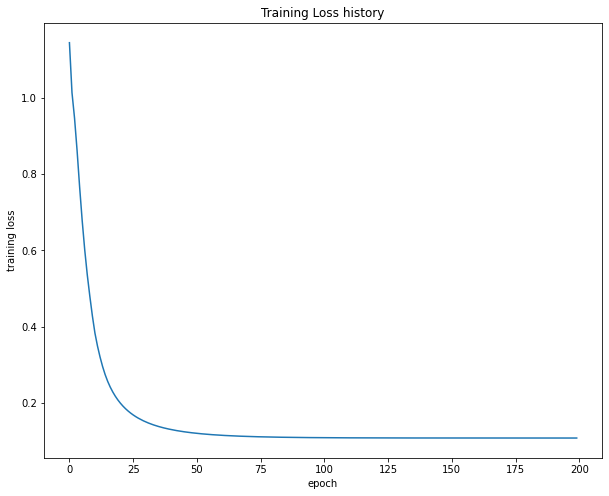

In [ ]:
net = TwoLayerMLP(input_size, hidden_size, num_classes)
scores = forward_layers(net.models, X)

stats = net.train(X, y, X, y,learning_rate=0.5, reg=1e-5, num_epochs=200, verbose=False)
print ('Final training loss: ', stats['loss_history'][-1])

plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Problem 4: Pytorch Intro (25 points)
## **Q4.0**: Pytorch tutorials
This homework will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in this course.

Before starting the homework, please go over these introductory tutorials on the PyTorch webpage:

*   [60-minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [ ]:
import torch

The `torch.Tensor` class is the basic building block in PyTorch and is used to hold data and parameters. The `autograd` package provides automatic differentiation for all operations on Tensors. After reading about Autograd in the tutorials above,  we will implement a few simple examples of what Autograd can do.

## **Q4.1**. Simple function
 Use `autograd` to do backpropagation on the simple function we saw in lecture, $f=(x+y)*z$. 

**Q4.1.1** Create the three inputs with values $x=-2$, $y=5$ and $z=-4$ as tensors and set `requires_grad=True` to track computation on them.



In [ ]:
# solution here
x = torch.tensor(-2.0, requires_grad= True)
y = torch.tensor(5.0, requires_grad= True)
z = torch.tensor(-4.0, requires_grad= True)

**Q4.1.2** Compute the $q=x+y$ and $f=q \times z$ functions, creating tensors for them in the process. Print out $q,f$, then run `f.backward(retain_graph=True)`, to compute the gradients w.r.t. $x,y,z$. The `retain_graph` attribute tells autograd to keep the computation graph around after backward pass as opposed deleting it (freeing some memory). Print the gradients. Note that the gradient for $q$ will be `None` since it is an intermediate node, even though `requires_grad` for it is automatically set to `True`. To access gradients for intermediate nodes in PyTorch you can use hooks as mentioned in [this answer](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94/2). Compute the values by hand (or check the slides) to verify your solution.

In [ ]:
# solution here
q = x+y
f = q*z
q.register_hook(print)
print(q, f)
f.backward(retain_graph= True)
print(x.grad)
print(y.grad)
print(z.grad)

tensor(3., grad_fn=<AddBackward0>) tensor(-12., grad_fn=<MulBackward0>)
tensor(-4.)
tensor(-4.)
tensor(-4.)
tensor(3.)


**Q4.1.3** If we now run `backward()` again, it will add the gradients to their previous values. Try it by running the above cell multiple times. This is useful in some cases, but if we just wanted to re-compute the gradients again, we need to zero them first, then run `backward()`. Add this step, then try running the  backward function multiple times to make sure the answer is the same each time!

In [ ]:
# solution here
x.grad.data.zero_()
y.grad.data.zero_()
z.grad.data.zero_()
f.backward(retain_graph= True)
print(x.grad)
print(y.grad)
print(z.grad)

tensor(-4.)
tensor(-4.)
tensor(-4.)
tensor(3.)


## **Q4.2** Neuron
 Implement the function corresponding to one neuron (logistic regression unit) that we saw in the lecture and compute the gradient w.r.t. $x$ and $w$. The function is $f=\sigma(w^Tx)$ where $\sigma()$ is the sigmoid function. Initialize $x=[-1, -2, 1]$ and the weights to $w=[2, -3, -3]$ where $w_3$ is the bias. Print out the gradients and double check their values by hand.

In [ ]:
# solution here

def sigmoid(x):
  return 1/(1+torch.exp(-x))
x = torch.tensor([[-1.,-2.,1.]], requires_grad= True)
w = torch.tensor([[2.,-3.,-3.]], requires_grad=True)
f = sigmoid(w@x.T)
f.backward()
print(x.grad)
print(w.grad)

tensor([[ 0.3932, -0.5898, -0.5898]])
tensor([[-0.1966, -0.3932,  0.1966]])


## **Q4.3**. torch.nn
 We will now implement the same neuron function $f$ with the same variable values as in Q4.2, but using the `Linear` class from `torch.nn`, followed by the [Sigmoid](https://pytorch.org/docs/stable/nn.html#torch.nn.Sigmoid) class. In general, many useful functions are already implemented for us in this package. Compute the gradients $\partial f/\partial w$ by running `backward()` and print them out (they will be stored in the Linear variable, e.g. in `.weight.grad`.) 

In [ ]:
# solution here
x = torch.tensor([[-1.,-2.,1.]], requires_grad= True)
w = torch.tensor([[2.,-3.,-3.]], requires_grad=True)

L = torch.nn.Linear(3,1)
L.weight.data.copy_(w)

s = torch.nn.Sigmoid()

g = L(x)
f = s(g)
f.backward()
print(L.weight.grad)

tensor([[-0.2203, -0.4406,  0.2203]])


## **Q4.4** Module
 Now lets put these two functions (Linear and Sigmoid) together into a "module". Read the [Neural Networks tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) if you have not already.

**Q4.4.1** Make a subclass of the `Module` class, called `Neuron`. Set variables to the same values as above. You will need to define the `__init__` and `forward`



In [ ]:
# solution here
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear = torch.nn.Linear(3,1)
    self.Sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    x = self.Linear(x)
    x = self.Sigmoid(x)
    return x

x = torch.tensor([[-1.,-2.,1.]], requires_grad= True)
net = Neuron()
print(net.forward(x))

tensor([[0.1674]], grad_fn=<SigmoidBackward>)


**Q4.4.2** Now create a  variable of your `Neuron` class called `my_neuron` and run backpropagation on it. Print out the gradients again. Make sure you zero out the gradients first, by calling `.zero_grad()` function of the parent class. Even if you will not re-compute the backprop, it is good practice to do this every time to avoid accumulating gradient!

In [ ]:
# solution here
my_neuron = Neuron()
my_neuron.zero_grad()
f = my_neuron.forward(x)
f.backward()

print(my_neuron)
print(my_neuron.parameters)

print(my_neuron.Linear.weight.grad)

Neuron(
  (Linear): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)
<bound method Module.parameters of Neuron(
  (Linear): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)>
tensor([[-0.1758, -0.3517,  0.1758]])


## **Q4.5**. Loss and SGD
 Now, lets train our neuron on some data. The code below creates a toy dataset containing a few inputs $x$ and outputs $y$ (a binary 0/1 label), as well as a function that plots the data and current solution.

w0 = 0.17473028600215912 w1 = -0.5557648539543152 bias = 0.06823863834142685


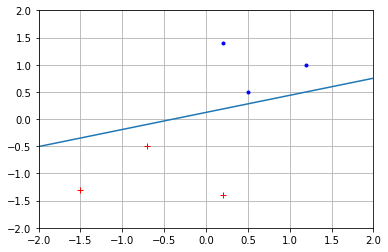

In [ ]:
import matplotlib.pyplot as plt

# create some toy 2-D datapoints with binary (0/1) labels
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5], 
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]])
y = torch.tensor([0, 0, 0, 1, 1, 1 ])

def plot_soln(x, y, params):
  plt.plot(x[y==1,0], x[y==1,1], 'r+')
  plt.plot(x[y==0,0], x[y==0,1], 'b.')
  plt.grid(True)
  plt.axis([-2, 2, -2, 2])
  
  # NOTE : This may depend on how you implement Neuron.
  #   Change accordingly
  w0 = params[0][0][0].item()
  w1 = params[0][0][1].item()
  bias = params[1][0].item()
  
  print("w0 =", w0, "w1 =", w1, "bias =", bias)
  dbx = torch.tensor([-2, 2])
  dby = -(1/w1)*(w0*dbx + bias)  # plot the line corresponding to the weights and bias
  plt.plot(dbx, dby)

params = list(my_neuron.parameters())
plot_soln(x, y, params)

**Q4.5.1** Declare an object `criterion` of type `nn.CrossEntropyLoss`. Note that this can be called as a function on two tensors, one representing the network outputs and the other, the targets that the network is being trained to predict, to return the loss. Print the value of the loss on the dataset using the initial weights and bias defined above in Q4.2.

In [ ]:
# solution here
criterion = torch.nn.CrossEntropyLoss()
w = torch.tensor([[2.,-3.,-3.]], requires_grad=True)
def init_weight(layer):
  if type(layer) == torch.nn.Linear:
    layer.weight.data.copy_(w)
my_neuron.apply(init_weight)
ones = torch.ones(6,1)
# create some toy 2-D datapoints with binary (0/1) labels
x = torch.tensor([[1.2, 1, 1.], [0.2, 1.4, 1.], [0.5, 0.5, 1.], 
                  [-1.5, -1.3, 1.], [0.2, -1.4, 1.], [-0.7, -0.5, 1.]])
y = torch.tensor([0, 0, 0, 1, 1, 1 ])

output = my_neuron.forward(x)
tmp = torch.tensor([[1-output[i][0].item()] for i in range(len(y))])
loss_in = torch.cat((tmp,output),1)
loss = criterion(loss_in, y)
print(loss)
loss.backward()


tensor(0.6274, grad_fn=<NllLossBackward>)


**Q4.5.2** Print out the chain of `grad_fn` functions backwards starting from `loss.grad_fn`  to demonstrate what backpropagation will be run on.

In [ ]:
# solution here
function = loss.grad_fn
print(function)
while function :
  print(function.next_functions[0][0])
  function = function.next_functions[0][0]

None


**Q4.5.3** Run the Stochastic Gradient Descent (SGD) optimizer from the `torch.optim` package to train your classifier on the toy dataset. Use the entire dataset in each batch. Use a learning rate of $0.01$ (no other hyperparameters). You will need to write a training loop that uses the `.step()` function of the optimizer. Plot the solution and print the loss after 10000 iterations.

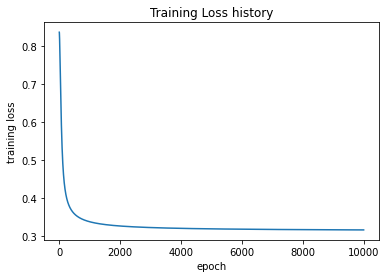

In [ ]:
# solution here
input = x  #(6,2)
lablels = y  #(6,1)
my_2_neuron = Neuron()
my_2_neuron.Linear = torch.nn.Linear(2,2)
my_2_neuron.zero_grad()
x = torch.tensor([[1.2, 1.], [0.2, 1.4], [0.5, 0.5], 
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]])
y = torch.tensor([0, 0, 0, 1, 1, 1 ])
optimizer = torch.optim.SGD(my_2_neuron.parameters(), lr=0.01, momentum=0.9)
loss_function = torch.nn.CrossEntropyLoss()

plot_loss=[]
for i in range(10000):
  optimizer.zero_grad()
  output = my_2_neuron(input)
  loss = loss_function(output, lablels)
  plot_loss.append(loss)
  loss.backward()
  optimizer.step()

plt.plot(plot_loss)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

**Q4.5.4** How many thousands of iterations does it take (approximately) until the neuron learns to classify the data correctly?

***Solution***

after 3000 iterations 

## **Q4.6**. Hidden space ablation

Now let's look at the size of network's hidden space. We will create and train a **2-layer MLP** network on the [SVHN Dataset](http://ufldl.stanford.edu/housenumbers/).

The SVHN dataset consists of photos of house numbers, collected automatically using Google's Street View. Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. Google’s Street View imagery contains hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. Below are example images from the dataset. Note that for this dataset, each image (32x32 pixels) has been cropped around a single number in its center, which is the number we want to classify.

![SVHN images](http://ufldl.stanford.edu/housenumbers/32x32eg.png)

In this problem, we turn the input images into grayscale and then flat them into 1-D vector. First, download the SVHN dataset using `torchvision` and display the images in the first batch. Take a look at the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial for an example. Follow the settings used there, such as the normalization, batch size of 4 for the `torch.utils.data.DataLoader`, etc.


In [ ]:
# solution here
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.Grayscale(num_output_channels=1),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5), std=(0.5))])

trainset = torchvision.datasets.SVHN(root='svhn', split = 'train', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=0)

testset = torchvision.datasets.SVHN(root='svhn', split = 'test',download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=0)

torch.Size([4, 1, 32, 32])


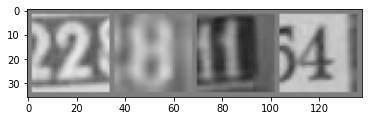

tensor(2) tensor(8) tensor(1) tensor(4)
torch.Size([4, 1024])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
# show images

imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(4)))
images = images.view(images.shape[0], -1)
print(images.shape)

### Q4.6.1 2-layer MLP 

Next, we will train a 2-layer MLP on the data. We have defined a simple 2-layer MLP for you with two fc layers and ReLU activation.



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Neuron(nn.Module):
    def __init__(self, hidden_size):
        super(Neuron, self).__init__()
        self.l1 = nn.Linear(1024, hidden_size)
        self.l2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 1024)
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

You can check the number of parameters in the model by printing out the model summary.

In [ ]:
def model_summary(model):
  print("model_summary")
  print()
  print("Layer_name"+"\t"*7+"Number of Parameters")
  print("="*100)
  model_parameters = [layer for layer in model.parameters() if layer.requires_grad]
  layer_name = [child for child in model.children()]
  j = 0
  total_params = 0
  print("\t"*10)
  for i in layer_name:
    print()
    param = 0
    try:
      bias = (i.bias is not None)
    except:
      bias = False  
    if not bias:
      param =model_parameters[j].numel()+model_parameters[j+1].numel()
      j = j+2
    else:
      param =model_parameters[j].numel()
      j = j+1
    print(str(i)+"\t"*3+str(param))
    total_params+=param
  print("="*100)
  print(f"Total Params:{total_params}")       

my_neuron = Neuron(10)
model_summary(my_neuron)

model_summary

Layer_name							Number of Parameters
										

Linear(in_features=1024, out_features=10, bias=True)			10240

Linear(in_features=10, out_features=10, bias=True)			10
Total Params:10250


Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.001$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_neuron.parameters(), lr = 0.001, momentum=0.9)
if torch.cuda.is_available():
  dev = 'cuda:0'
else:
  dev ='cpu'
device = torch.device(dev)

### Q4.6.2 Training
Complete the training loop that makes five full passes through the dataset (five epochs) using SGD. Your batch size should be 4 and hidden size is 10. 
*italicized text*

[1,  2000] loss: 2.195
[1,  4000] loss: 1.892
[1,  6000] loss: 1.660
[1,  8000] loss: 1.503
[1, 10000] loss: 1.440
[1, 12000] loss: 1.362
[1, 14000] loss: 1.351
[1, 16000] loss: 1.333
[1, 18000] loss: 1.328
[2,  2000] loss: 1.297
[2,  4000] loss: 1.305
[2,  6000] loss: 1.270
[2,  8000] loss: 1.254
[2, 10000] loss: 1.277
[2, 12000] loss: 1.262
[2, 14000] loss: 1.250
[2, 16000] loss: 1.283
[2, 18000] loss: 1.260
[3,  2000] loss: 1.225
[3,  4000] loss: 1.224
[3,  6000] loss: 1.254
[3,  8000] loss: 1.235
[3, 10000] loss: 1.252
[3, 12000] loss: 1.217
[3, 14000] loss: 1.226
[3, 16000] loss: 1.212
[3, 18000] loss: 1.250
[4,  2000] loss: 1.199
[4,  4000] loss: 1.215
[4,  6000] loss: 1.227
[4,  8000] loss: 1.190
[4, 10000] loss: 1.238
[4, 12000] loss: 1.213
[4, 14000] loss: 1.171
[4, 16000] loss: 1.217
[4, 18000] loss: 1.197
[5,  2000] loss: 1.195
[5,  4000] loss: 1.182
[5,  6000] loss: 1.217
[5,  8000] loss: 1.184
[5, 10000] loss: 1.178
[5, 12000] loss: 1.199
[5, 14000] loss: 1.195
[5, 16000] 

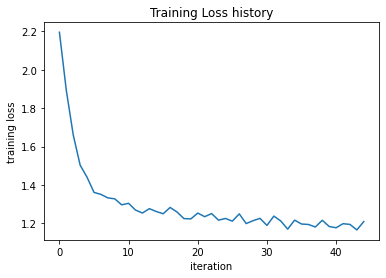

In [ ]:
my_neuron = Neuron(10)

# create your optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_neuron.parameters(), lr = 0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    ## -- ! code required  
    output = my_neuron(inputs)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats.append(running_loss / 2000)
        running_loss = 0.0
plt.plot(stats)
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

Train the model again but this time set the hidden size as 100. 


[1,  2000] loss: 2.131
[1,  4000] loss: 1.684
[1,  6000] loss: 1.389
[1,  8000] loss: 1.248
[1, 10000] loss: 1.135
[1, 12000] loss: 1.090
[1, 14000] loss: 1.044
[1, 16000] loss: 0.990
[1, 18000] loss: 0.958
[2,  2000] loss: 0.940
[2,  4000] loss: 0.917
[2,  6000] loss: 0.891
[2,  8000] loss: 0.852
[2, 10000] loss: 0.887
[2, 12000] loss: 0.848
[2, 14000] loss: 0.812
[2, 16000] loss: 0.839
[2, 18000] loss: 0.824
[3,  2000] loss: 0.745
[3,  4000] loss: 0.758
[3,  6000] loss: 0.761
[3,  8000] loss: 0.759
[3, 10000] loss: 0.754
[3, 12000] loss: 0.770
[3, 14000] loss: 0.742
[3, 16000] loss: 0.722
[3, 18000] loss: 0.734
[4,  2000] loss: 0.701
[4,  4000] loss: 0.731
[4,  6000] loss: 0.698
[4,  8000] loss: 0.655
[4, 10000] loss: 0.707
[4, 12000] loss: 0.670
[4, 14000] loss: 0.668
[4, 16000] loss: 0.648
[4, 18000] loss: 0.703
[5,  2000] loss: 0.621
[5,  4000] loss: 0.643
[5,  6000] loss: 0.655
[5,  8000] loss: 0.633
[5, 10000] loss: 0.665
[5, 12000] loss: 0.655
[5, 14000] loss: 0.626
[5, 16000] 

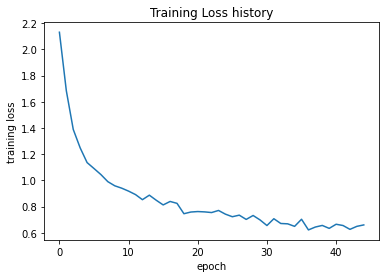

In [ ]:
# solution here
my_neuron = Neuron(100)

# create your optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_neuron.parameters(), lr = 0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    ## -- ! code required  
    output = my_neuron(inputs)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats.append(running_loss / 2000)
        running_loss = 0.0
plt.plot(stats)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [ ]:
def test_on_SVHN(net, testloader):   
      ## -- ! code required
      correct = 0
      total = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data[0].to(device), data[1].to(device)
              outputs = net(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item() 
      acc =100 * correct / total        
      return acc
train_acc = test_on_SVHN(my_neuron, trainloader)
print('Accuracy of the network on the train images: %d %%' % ( train_acc))
acc = test_on_SVHN(my_neuron, testloader)
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the train images: 82 %
Accuracy of the network on the 10000 test images: 78 %


In [ ]:

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net =Net()
model_summary(net)

model_summary

Layer_name							Number of Parameters
										

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))			450

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)			2406

Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))			16

Linear(in_features=400, out_features=64, bias=True)			25600

Linear(in_features=64, out_features=32, bias=True)			64

Linear(in_features=32, out_features=10, bias=True)			2048
Total Params:30584


### Q4.6.3

Compare the performance when hidden_size=10 with hidden_size=100, and explain the difference.

larger hidden size means larger parameters. increasing the nubmer of parameters can increase hypothesis function. too many parameters can decrease the trainning error. on the other hand, it may make your data overfitted. 